___
Lab 7

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = np.genfromtxt("ionosphere.txt", delimiter=",",
    usecols=np.arange(34))
y = np.genfromtxt("ionosphere.txt", delimiter=",",
    usecols=34, dtype='int')
X_train, X_test, y_train, y_test = train_test_split(X, y,
    random_state=42)
def fit_predict_mean(knn: KNeighborsClassifier):
    knn.fit(X_train, y_train)
    k = (np.mean(knn.predict(X_test)==y_test))
    print(k)
    return k

def fit_score(knn: KNeighborsClassifier):
    knn.fit(X_train, y_train)
    k = knn.score(X_test, y_test)
    print(k)
    return k

In [2]:
knn = KNeighborsClassifier(n_neighbors=1)
fit_predict_mean(knn)
KNeighborsClassifier(algorithm='auto', leaf_size=30,
    metric='minkowski', metric_params=None, n_jobs=1,
    n_neighbors=1, p=2, weights='uniform')

0.8522727272727273


KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [3]:
def my_dist(x, y):
    return np.sum((x-y)**2)
knn = KNeighborsClassifier(n_neighbors=1, metric=my_dist)
fit_predict_mean(knn)

0.8522727272727273


0.8522727272727273

In [4]:
np.mean(knn.predict(X_test)==y_test)

0.8522727272727273

In [5]:
knn = KNeighborsClassifier(n_neighbors=1, p=1)
fit_predict_mean(knn)

0.9090909090909091


0.9090909090909091

___
Exercise 1

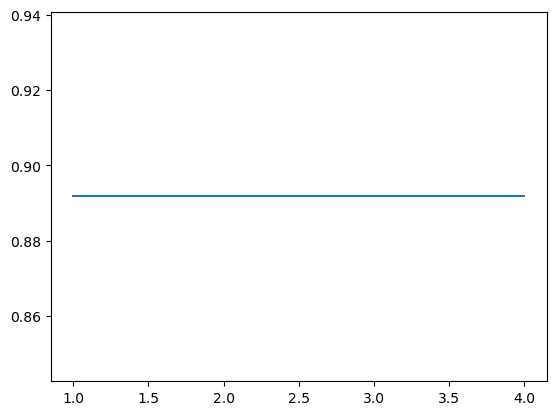

In [6]:
from sklearn.model_selection import cross_val_score
results = np.empty(4)
for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=1, p=1)
    results[i-1] = np.mean(cross_val_score(knn, X, y))
import matplotlib.pyplot as plt
plt.plot(np.arange(1,5),results)

___

In [7]:
def poly_kernel(x, y, d):
    return (1+np.dot(x,y))**d
d = 2 # trying the polynomial kernel of degree d
def poly_dist(x, y): # squared distance
    return poly_kernel(x,x,d) + poly_kernel(y,y,d)\
        - 2*poly_kernel(x,y,d)
knn = KNeighborsClassifier(n_neighbors=1, metric=poly_dist)
fit_score(knn)

0.8522727272727273


0.8522727272727273

In [8]:
def rbf_kernel(x, y, gamma):
    return np.exp(-gamma*np.sum((x-y)**2))
gamma = 1 # the parameter gamma of the rbf kernel
def rbf_dist(x, y): # squared distance
    return rbf_kernel(x,x,gamma) + rbf_kernel(y,y,gamma)\
        - 2*rbf_kernel(x,y,gamma)
knn = KNeighborsClassifier(n_neighbors=1, metric=rbf_dist)
fit_score(knn)

0.8522727272727273


0.8522727272727273

In [9]:
best_score = 0
for gamma in [0.01, 0.1, 1, 10, 100]:
# for each parameter, train a model
    def rbf_dist(x, y): # squared distance
        return rbf_kernel(x,x,gamma) + rbf_kernel(y,y,gamma)\
            - 2*rbf_kernel(x,y,gamma)
    knn = KNeighborsClassifier(n_neighbors=1, metric=rbf_dist)
    # perform cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_gamma = gamma
    # rebuild a model on the full training set
def rbf_dist(x, y): # squared distance
    return rbf_kernel(x,x,gamma) + rbf_kernel(y,y,gamma)\
        - 2*rbf_kernel(x,y,gamma)
knn = KNeighborsClassifier(n_neighbors=1, metric=rbf_dist)
knn.fit(X_train, y_train)
test_score = knn.score(X_test, y_test)
print("Best CV score:", best_score)
print("Best parameter gamma:", best_gamma)
print("Test set score with best parameters:", test_score)


Best CV score: 0.9317851959361393
Best parameter gamma: 10
Test set score with best parameters: 0.7045454545454546


In [10]:
class Cs_Classifier(KNeighborsClassifier):
    """My first example of a classifier"""
    def __init__ (self, n_neighbors=1, kernel = 1):
        def my_dist(x, y):
            return np.sum((x-y)**2)
        self.kernel = kernel
        self.n_neighbors = n_neighbors
        if self.kernel == 1:
            self.kernel = my_dist
        KNeighborsClassifier.__init__(self, n_neighbors=self.n_neighbors, metric=self.kernel)
    def fit(self, X, y):
        KNeighborsClassifier.fit(self, X, y)
        return self
    def predict(self, X, y=None):
        return KNeighborsClassifier.predict(self, X)
    def score(self, X, y):
        return KNeighborsClassifier.score(self, X, y)
    def predict_proba(self, X):
        return KNeighborsClassifier.predict_proba(self, X)


In [11]:
knn = Cs_Classifier()
fit_score(knn)

0.8522727272727273


0.8522727272727273

In [12]:
class rbfClassifier(Cs_Classifier):
    """Kernel K-nearest neighbours classifier"""
    def __init__(self, n_neighbors=1, gamma=1):
        def rbf_dist(x, y): # squared distance
            return rbf_kernel(x,x,gamma) + rbf_kernel(y,y,gamma)\
                - 2*rbf_kernel(x,y,gamma)
        Cs_Classifier.__init__(self, n_neighbors=1, kernel = rbf_dist)
        self.gamma = gamma
        self.n_neighbors=n_neighbors
    def fit(self, X, y):
        Cs_Classifier.fit(self, X, y)
        return self
    def predict(self, X, y=None):
        return Cs_Classifier.predict(self, X)
    def score(self, X, y):
        return Cs_Classifier.score(self, X, y)
    def predict_proba(self, X):
        return Cs_Classifier.predict_proba(self, X)


In [13]:
knn = rbfClassifier()
fit_score(knn)

0.8522727272727273


0.8522727272727273

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
    iris.target, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [15]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob

array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

___
Exercise 2

In [16]:
def map_proba(predicts, result):
    mapped = [np.argmax(i) for i in predicts]
    mapped = [result[j] for j in mapped]
    return mapped
y_pred_prob = map_proba(y_pred_prob, [0,1,2])
print(y_pred_prob)
y_pred_prob == y_pred

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

___
Exercise 3,4

In [17]:
knn = rbfClassifier()
fit_predict_mean(knn)
knn.predict_proba(X_test)

1.0


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

___